## [Wstęp do R](https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/R/)


### Zadanie 1.
   Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów.

  - W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)).
  - Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)
  

In [1]:
# Wczytywanie danych 
input = read.csv("results.csv")

In [2]:
# Agregacja czasów po dimensions (rodzaju algorytmu) i wymiarach
agg = aggregate(time_in_ms ~ dimensions:size, data = input, FUN = mean)

In [3]:
# Dodanie kolumny z odchyleniem standardowym dla każdej kategorii.
agg$sd = aggregate(time_in_ms ~ dimensions:size, data = input, FUN = sd)$time_in_ms
agg

dimensions,size,time_in_ms,sd
2,1000,1.9025,0.59063530
2,1292,2.6732,0.01820134
2,1668,4.4068,0.01569713
2,2154,7.3127,0.03136895
2,2783,12.1550,0.06365358
2,3594,20.2278,0.11161322
2,4642,33.6542,0.09174457
2,5995,55.9353,0.02500244
2,7743,93.3085,0.08723818
2,10000,155.7292,0.30474135


Rezultaty pochodzą z zadania z laboratorium 2. Zawierają czasy trwania w milisekundach wywołań funkcji <i>gsl_blas_ddot</i> (mnożenie dwóch wektorów) i <i>gsl_blas_dgemv</i> (mnożenie macierzy przez wektor) z biblioteki GSL języka C. Potrzebujemy rozdzielić rezultaty do dwóch tablic:

In [4]:
ddot = agg[agg$dimensions==1,]
dgemv = agg[agg$dimensions==2,]
ddot$dimensions <- NULL
dgemv$dimensions <- NULL

### Zadanie 2.
  - Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy)
  - Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników. Słupki błędów można narysować korzystając z funkcji geom_errorbar pakietu ggplot2.

In [5]:
# install.packages("ggplot2")
library("ggplot2")

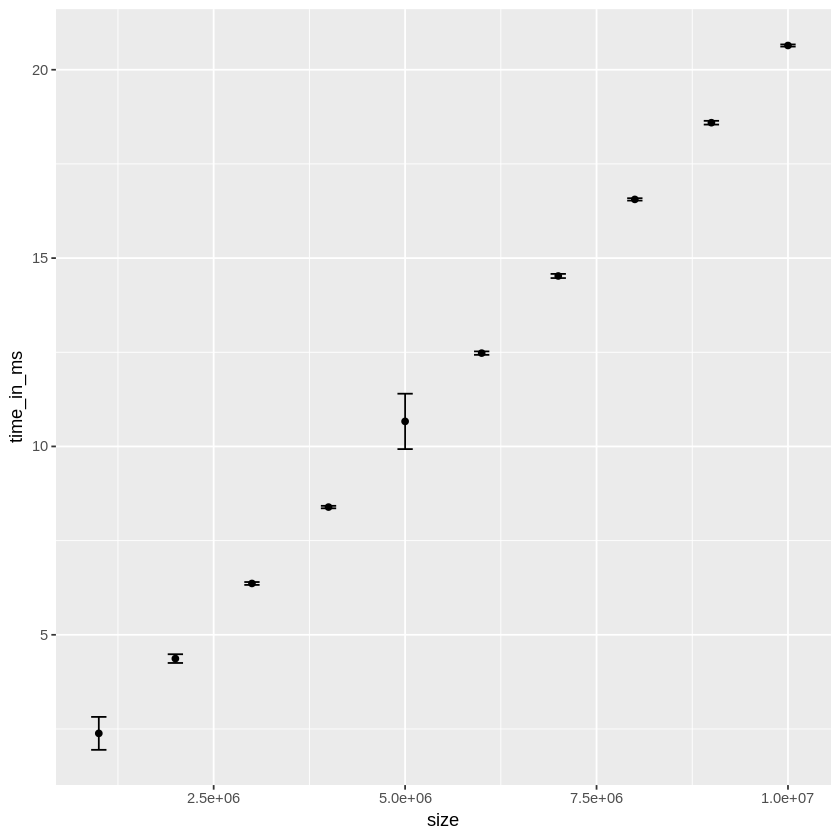

In [6]:
# Rysowanie wykresu dla mnożenia wektorów
ggplot(ddot, aes(size,time_in_ms)) +
    geom_point() +
    geom_errorbar(aes(ymin = time_in_ms - sd, ymax = time_in_ms + sd), width = 200000)

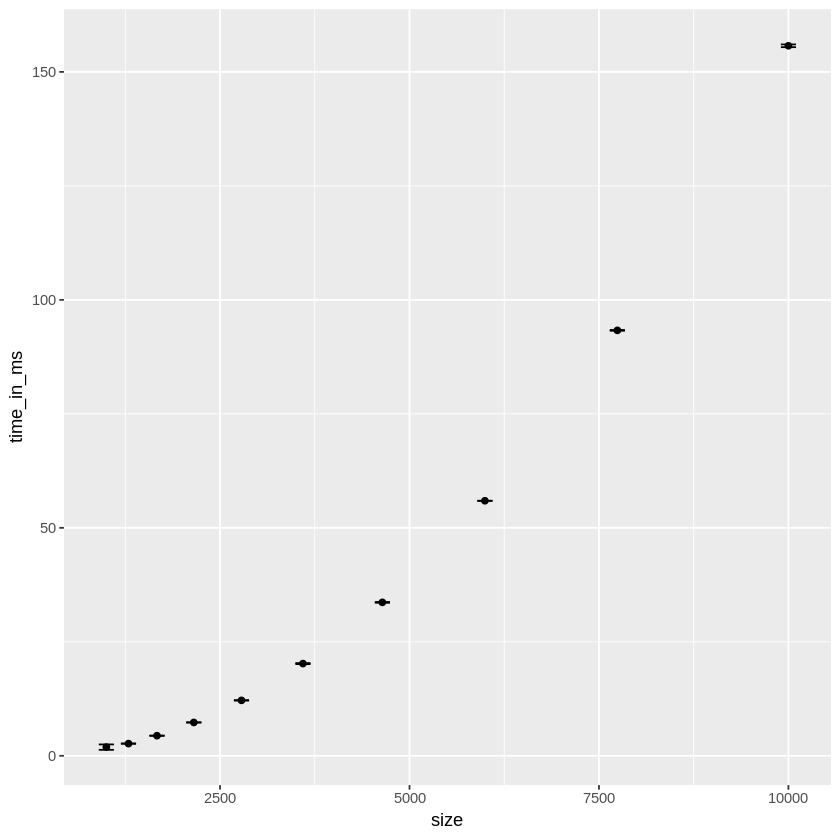

In [7]:
# Rysowanie wykresu dla mnożenia macierzy przez wektor
ggplot(dgemv, aes(size,time_in_ms)) +
    geom_point() +
    geom_errorbar(aes(ymin = time_in_ms - sd, ymax = time_in_ms + sd), width = 200)

### Zadanie 3.

  - Uzyc aproksymacji wielomianowej dostepnej w jezyku R do znalezienia odpowiednich wielomianow, ktore najlepiej pasuja do wynikow kazdego z algorytmow. Dodac wykresy uzyskanych wielomianow do wykresu.

In [8]:
ddy = ddot$time_in_ms
ddx = ddot$size
dgy = dgemv$time_in_ms
dgx = dgemv$size

# Dopasowywanie wielomianów
pdd = lm(ddy ~ poly(ddx, 1, raw=TRUE))
pdg = lm(dgy ~ poly(dgx, 2, raw=TRUE))

In [9]:
pdda = data.frame(ddx = seq(min(ddx),max(ddx),length.out=250))
pdga = data.frame(dgx = seq(min(dgx),max(dgx),length.out=250))
pdda$ddy = predict(pdd, pdda)
pdga$dgy = predict(pdg, pdga)

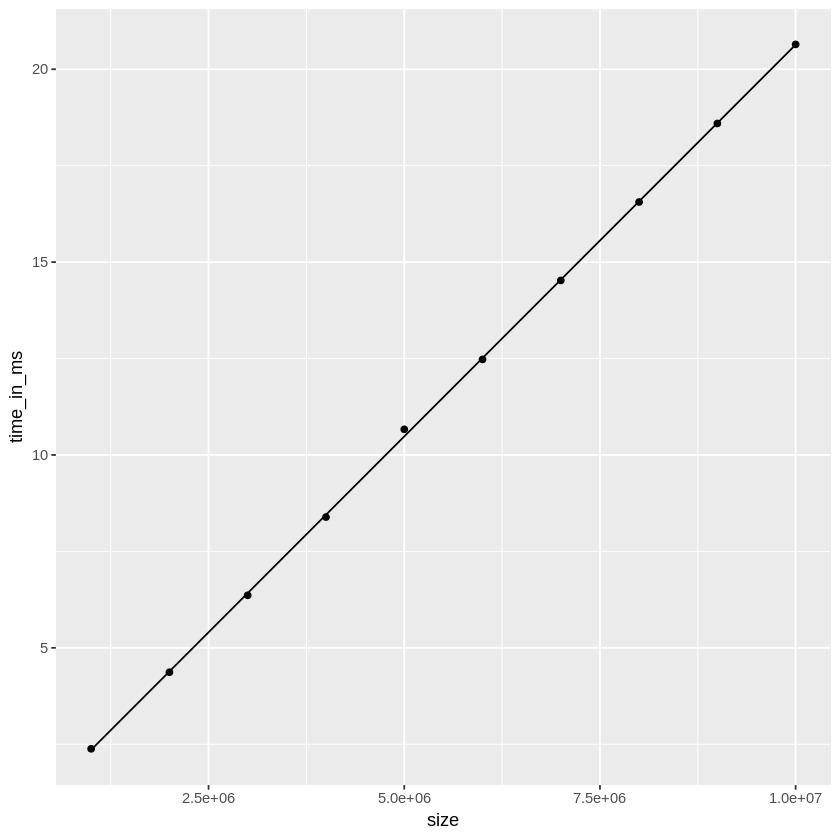

In [10]:
# Rysowanie wykresu ddot z aproksymacją funkcją liniową
ggplot(ddot, aes(size,time_in_ms)) +
    geom_point() +
    geom_line(data=pdda, aes(ddx,ddy))

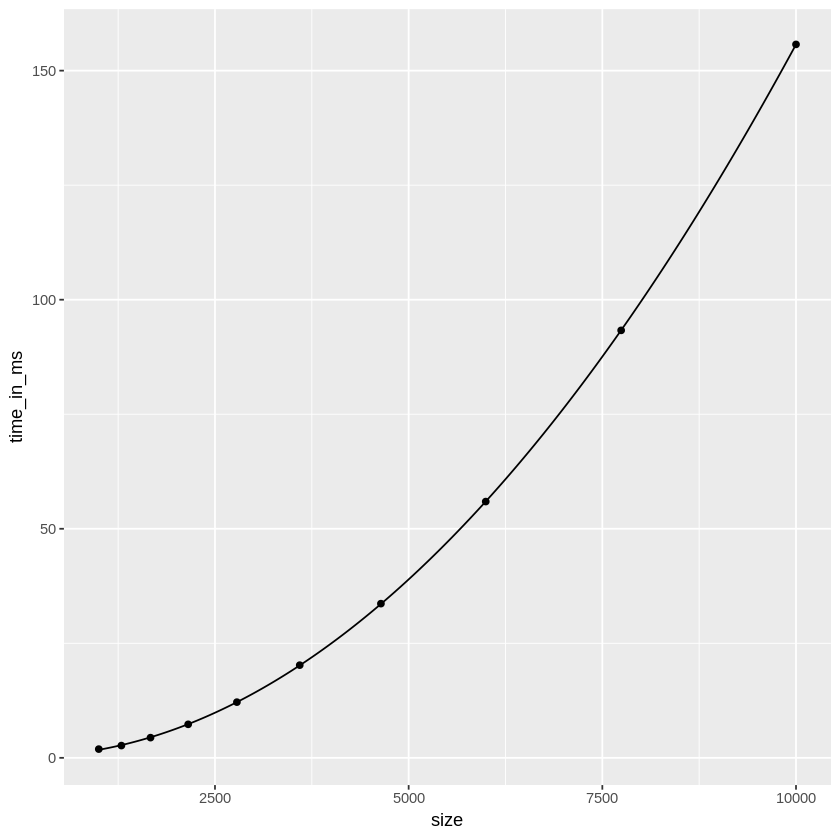

In [11]:
# Rysowanie wykresu ddot z aproksymacją funkcją kwadratową
ggplot(dgemv, aes(size,time_in_ms)) +
    geom_point() +
    geom_line(data=pdga, aes(dgx,dgy))